In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
import seaborn as sns

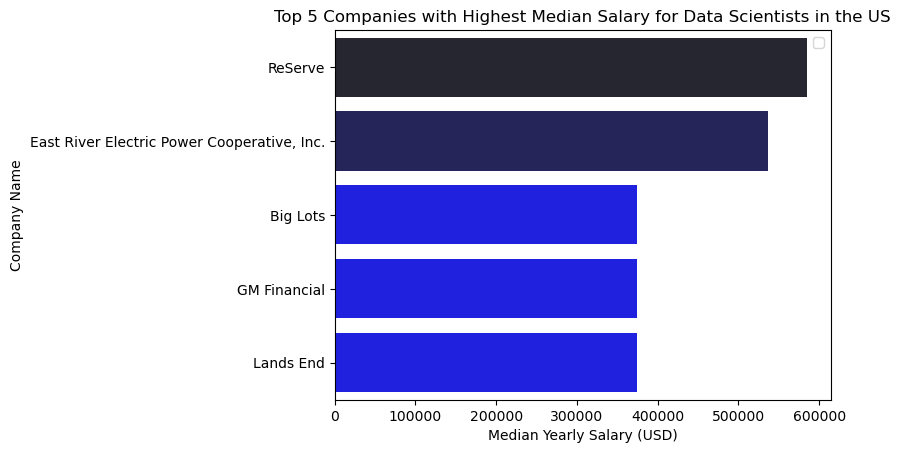

In [5]:
# Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for 
# Data Scientist job postings in the United States.

df_DS_US = df[
    (df['job_title_short'] == 'Data Scientist') & 
    (df['job_country'] == 'United States')
    ].dropna(subset=['salary_year_avg']).copy()

top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median()
top_companies = top_companies.sort_values(ascending=False).head(5)

top_companies = top_companies.reset_index()
top_companies.columns = ['company_name', 'salary_year_avg']


sns.barplot(data=top_companies, x='salary_year_avg', y='company_name', hue = 'salary_year_avg', palette = 'dark:b_r')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.legend("")
plt.show()




Text(0.5, 0, 'Yearly Salary (USD)')

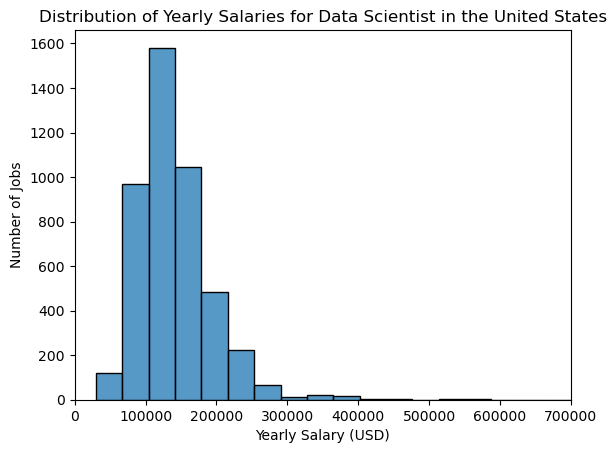

In [12]:
# Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) 
# for Data Scientist job postings in the United States:
# Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
# Use 25 bins for the histogram and set the x-axis limit to 700,000.
# Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label 
# the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

df_DS_US = df[
    (df['job_title_short'] == 'Data Scientist') &
    (df['job_country'] == 'United States')
].dropna(subset = 'salary_year_avg').copy()

sns.histplot(df_DS_US['salary_year_avg'], bins = 25, kde = False)
plt.xlim(0, 700000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary (USD)')

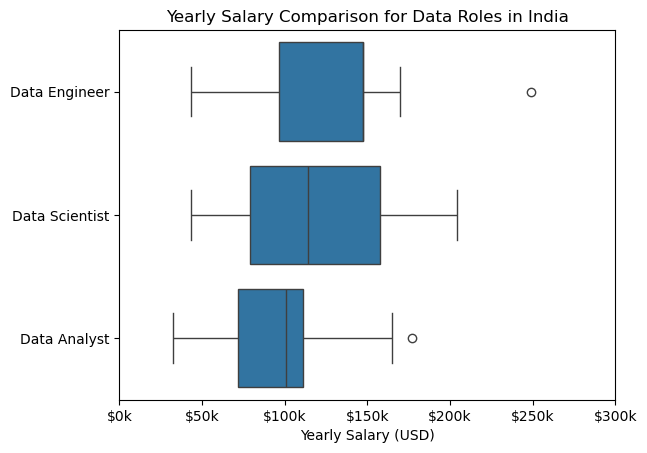

In [18]:
# Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, 
# and Data Scientist job postings in India:
# Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
# Set the x-axis limit to 300,000 and format it as $100k.
# Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
India_jobs = df[
    (df['job_country'] == 'India') &
    (df['job_title_short'].isin(job_titles))
].dropna(subset = 'salary_year_avg').copy()

sns.boxplot(data=India_jobs, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

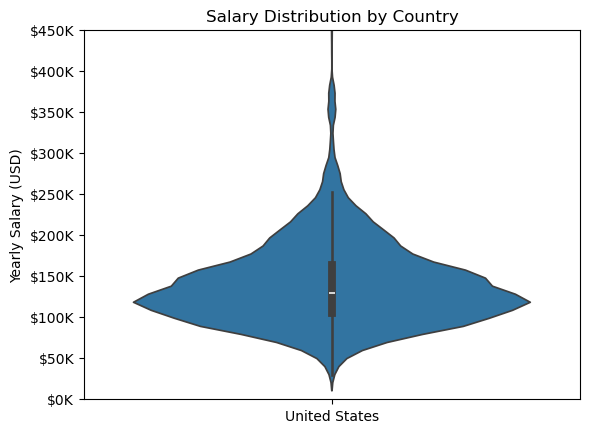

In [20]:
# Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
# Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

df_DS_US = df[
    (df['job_title_short'] == 'Data Scientist') &
    (df['job_country'] == 'United States')
    ].dropna(subset=['salary_year_avg'])

sns.violinplot(x = 'job_country', y = 'salary_year_avg', data = df_DS_US)
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()